In [18]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment_6.ipynb")

# STK 353

## Assignment 6: Machine Learning

#### Internal examiner: Ineke Derks
#### External examiner: Dr Sebnem Er

### Total points: 35

- Submission deadline: 23:00, Thursday 10 November 2021.
- This assignment is individual work.
- Some of the tests are hidden, and some are visible in order to guide you.


## Load the required packages

In [19]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation

### Question 1 - Prepare the data

The data can be found in 'IMDB.csv'. The IMDB dataset has 50K movie reviews, which can be used for natural language processing or text analytics. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. In this assignment, you are required to predict the number of positive and negative reviews using logistic regression and naive Bayes. Furthermore, you are required to determine the underlying topics using latent Dirichlet allocation.

#### Question 1.1 [1]

- Read the data into a dataframe and call it 'review'.
- **Important**: Make sure the dataset is saved in the **same** directory as your notebook.
- Write the review column to a list. Only use the first 2500 rows. Call this list 'X_arr'.

**Note**: Pay attention to the variable names specified. It is important that you keep to the names specified.

<!--
BEGIN QUESTION
name: q1.1
points: 
    each: 0.5
-->

In [20]:
df = pd.read_csv('IMDB.csv')
review = pd.DataFrame(df)
X_arr = review['review'].head(2500)
X_arr = X_arr.tolist()


In [9]:
grader.check("q1.1")

q1.1 results: All test cases passed!

#### Question 1.2 [1]

- Use sklearn.preprocessing LabelEncoder to encode the labels to binary values 0 or 1. Make a new column in the dataframe for this encoding and call it 'target'. Positive sentiment will be 1 and a negative sentiment will be 0.
- Drop the sentiment column.

<!--
BEGIN QUESTION
name: q1.2
points: 1
-->

In [21]:
le = LabelEncoder()
le.fit(review['sentiment'])
target = le.transform(review['sentiment'])
review['target'] = target
review = review.drop(columns=['sentiment'])

In [11]:
grader.check("q1.2")

q1.2 results: All test cases passed!

## Movie review sentiment classification

### Question 2 -  Logistic Regression

#### Question 2.1 [3]

- Use the sklearn TfidfVectorizer. Use the following parameters:
    - stop_words = 'english'.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'tfidf'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names_lr').
- Write the vectorization to a dataframe with the feature_names as column headings. Call the dataframe 'vectorized_text_lr'.

<!--
BEGIN QUESTION
name: q2.1
points: 
    each: 1
-->

In [22]:
tfidf = TfidfVectorizer(token_pattern = r'\b[^\d\W]+\b',stop_words='english')
bag_of_words = tfidf.fit_transform(X_arr)
feature_names_lr = tfidf.get_feature_names()
vectorized_text_lr = pd.DataFrame(bag_of_words.todense(),columns = feature_names_lr)
print(vectorized_text_lr)

        _  ___  ____  _____  \
0     0.0  0.0   0.0    0.0   
1     0.0  0.0   0.0    0.0   
2     0.0  0.0   0.0    0.0   
3     0.0  0.0   0.0    0.0   
4     0.0  0.0   0.0    0.0   
...   ...  ...   ...    ...   
2495  0.0  0.0   0.0    0.0   
2496  0.0  0.0   0.0    0.0   
2497  0.0  0.0   0.0    0.0   
2498  0.0  0.0   0.0    0.0   
2499  0.0  0.0   0.0    0.0   

      ________________________________________________________________  \
0                                                   0.0                  
1                                                   0.0                  
2                                                   0.0                  
3                                                   0.0                  
4                                                   0.0                  
...                                                 ...                  
2495                                                0.0                  
2496                               

In [64]:
grader.check("q2.1")

q2.1 results: All test cases passed!

#### Question 2.2 [1]

Split the data into a training and test set.

- Use a 70/30 split.
- Use a seed of 27.
- Name the training and test sets: X_train, Y_train, X_test, Y_test.

<!--
BEGIN QUESTION
name: q2.2
points: 
    each: 0.5
-->

In [23]:
#  X_train, Y_train, X_test, Y_test
train, test = train_test_split(vectorized_text_lr,test_size = 0.3, random_state= 27)
X_train = train
X_test = test
Y_train = review['target'][train.index]
Y_test = review['target'][test.index]


In [79]:
grader.check("q2.2")

q2.2 results: All test cases passed!

#### Question 2.3a [1]

- Use the training set to check the class imbalance of the data set and call it 'class_ratio'.

<!--
BEGIN QUESTION
name: q2.3a
points: 1
-->

In [24]:
class_ratio = Y_train.value_counts(normalize=True)*100

In [23]:
grader.check("q2.3a")

q2.3a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2.3b [1]

- In the markdown cell below, comment on the class ratio.

<!--
BEGIN QUESTION
name: q2.3b
points: 1
manual: true
-->

The class ratio is relatively 1:1, Which means the imbalance is minimal to non existant.

<!-- END QUESTION -->

#### Question 2.4  [1]

Create an instance of the logistic regression model. Specify solver = 'lbfgs'.

- Fit the model to the training data and call it 'logistic_model'. 
- Calculate the accuracy on the training data and call it 'log_acc'.

<!--
BEGIN QUESTION
name: q2.4
points: 1
-->

In [25]:
logistic_model = LogisticRegression(solver = 'lbfgs', random_state = 27)
logistic_model.fit(X_train,Y_train)

predicted = logistic_model.predict(X_train)

log_acc = metrics.accuracy_score(Y_train,predicted)
print(log_acc)

0.976


In [26]:
grader.check("q2.4")

q2.4 results: All test cases passed!

#### Question 2.5 [3]

Predict class labels for the test set and calculate the class probabilities.

- Call the predicted class labels 'predicted'.
- Call the predicted class probabilities 'probs'.

Calculate the following,

- Calculate the accuracy score on the test set and call it 'log_acc_score'.
- Calculate the precision score on the test set and call it 'log_prec_score'.
- Calculate the recall score on the test set and call it 'log_rec_score'.
- Calculate the auc (area under the curve) score on the test set and call it 'log_auc_score'.

**Note**: Round the 'log_acc_score', 'log_prec_score', 'log_rec_score', and 'log_auc_score' values to 4 decimal points.

<!--
BEGIN QUESTION
name: q2.5
points: 
    each: 1
-->

In [26]:
# predicted
probs = logistic_model.predict_proba(X_test)
predicted =  logistic_model.predict(X_test)
log_acc_score = metrics.accuracy_score(Y_test,predicted)
log_prec_score = metrics.precision_score(Y_test,predicted)
log_rec_score = metrics.recall_score(Y_test,predicted)
log_auc_score = metrics.roc_auc_score(Y_test,predicted)

log_auc_score = round(log_auc_score,4)
log_rec_score = round(log_rec_score,4)
log_prec_score = round(log_prec_score,4)
log_acc_score = round(log_acc_score,4)
print(log_auc_score ,log_rec_score ,log_prec_score,log_acc_score)

0.8349 0.8767 0.8074 0.8347


In [34]:
grader.check("q2.5")

q2.5 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2.6 [1]

Does the model perform better than randomly assigning classes? Explain why.

<!--
BEGIN QUESTION
name: q2.6
points: 1
manual: true
-->

NO, the accuracy score is below the score of the training data.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Question 2.7 [3]

Draw the ROC curve.

- Provide a title, x and y label.

<!--
BEGIN QUESTION
name: q2.7
manual: true
points: 3
-->

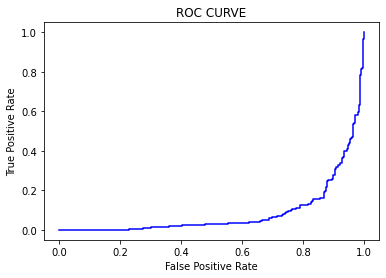

In [27]:
probs = logistic_model.predict_proba(X_test)
probs = probs[:,1]
probs
y_true = Y_test
y_probas = probs
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print ROC curve
# plt.plot(fpr,tpr)
# plt.show()

# roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC CURVE')
plt.plot(fpr, tpr, 'b')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


<!-- END QUESTION -->



### Question 3 -  Naive Bayes Classifier

#### Question 3.1 [3]

- Use the sklearn Countvectorizer. Use the following parameters:
    - stop_words = 'english'.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'matrix'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names_nb').
- Write the vectorization to a dataframe with the feature_names as column headings. Call the dataframe 'vectorized_text_nb'.

<!--
BEGIN QUESTION
name: q3.1
points: 
    each: 1
-->

In [28]:
matrix = CountVectorizer(token_pattern = r'\b[^\d\W]+\b',stop_words='english')
bag_of_words = matrix.fit_transform(X_arr)
feature_names_nb = matrix.get_feature_names()
vectorized_text_nb = pd.DataFrame(bag_of_words.todense(),columns = feature_names_nb)
print(vectorized_text_nb)

      _  ___  ____  _____  \
0     0    0     0      0   
1     0    0     0      0   
2     0    0     0      0   
3     0    0     0      0   
4     0    0     0      0   
...  ..  ...   ...    ...   
2495  0    0     0      0   
2496  0    0     0      0   
2497  0    0     0      0   
2498  0    0     0      0   
2499  0    0     0      0   

      ________________________________________________________________  \
0                                                     0                  
1                                                     0                  
2                                                     0                  
3                                                     0                  
4                                                     0                  
...                                                 ...                  
2495                                                  0                  
2496                                                  0    

In [13]:
grader.check("q3.1")

q3.1 results: All test cases passed!

#### Question 3.2 [1]

Split the data into a training and test set.

- Use a 70/30 split.
- Use a seed of 27.
- Name the training and test sets: X_train, Y_train, X_test, Y_test.

<!--
BEGIN QUESTION
name: q3.2
points: 
    each: 0.5
-->

In [29]:
train, test = train_test_split(vectorized_text_nb,test_size = 0.3, random_state= 27)
X_train = train
X_test = test
Y_train = review['target'][train.index]
Y_test = review['target'][test.index]

In [ ]:
grader.check("q3.2")

#### Question 3.3 [1]

Create an instance of the Naive Bayes model.

- Use MultinomialNB.
- Fit the model to the training data and call it 'nb_model'. 
- Calculate the accuracy on the training data and call it 'nb_acc'.

**Note**: Round the 'nb_acc' value to 4 decimal points.

<!--
BEGIN QUESTION
name: q3.3
points: 1
-->

In [31]:
nb = MultinomialNB()
nb_model = nb.fit(X_train,Y_train)
predicted = nb_model.predict(X_train)

nb_acc = metrics.accuracy_score(Y_train,predicted)
nb_acc = round(nb_acc,4)
print(nb_acc)

0.984


In [14]:
grader.check("q3.3")

q3.3 results: All test cases passed!

#### Question 3.4 [3]

Predict class labels for the test set and calculate the class probabilities.

- Call the predicted class labels 'predicted'.

Calculate the following,

- Calculate the accuracy score on the test set and call it 'nb_acc_score'.
- Calculate the precision score on the test set and call it 'nb_prec_score'.
- Calculate the recall score on the test set and call it 'nb_rec_score'.

**Note**: Round the 'nb_acc_score', 'nb_prec_score' and 'nb_rec_score' values to 4 decimal points.

<!--
BEGIN QUESTION
name: q3.4
points: 
    each: 1
-->

In [33]:
predicted =  logistic_model.predict(X_test)
nb_acc_score = metrics.accuracy_score(Y_test,predicted)
nb_prec_score = metrics.precision_score(Y_test,predicted)
nb_rec_score = metrics.recall_score(Y_test,predicted)

nb_rec_score = round(nb_rec_score,4)
nb_prec_score = round(nb_prec_score,4)
nb_acc_score = round(nb_acc_score,4)

print(nb_rec_score ,nb_prec_score,nb_acc_score)

0.6032 0.9 0.7693


In [ ]:
grader.check("q3.4")

<!-- BEGIN QUESTION -->

#### Question 3.5 [3]

Make use of the performance measures calculated and comment on the model performance.

<!--
BEGIN QUESTION
name: q3.5
manual: true
points: 3
-->

The model perfomance is poor in recall score, while it has high precision score of 90% and moderate accuracy score.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4 [3]

Which model do you recommend for classifying the IMDB review data? Give a motivation.

<!--
BEGIN QUESTION
name: q4
manual: true
points: 3
-->

I would recommend logistic regression, because model the model is consistent and has a good score for every performance measure, that was calculated.

<!-- END QUESTION -->



## Movie review: Topic modelling

### Question 5 - Latent Dirichlet Allocation (LDA)

#### Question 5.1 [1]

- Use the sklearn Countvectorizer. Use the following parameters:
    - stop_words = 'english'.
    - max_features = 1000.
    - token_pattern = r'\b[^\d\W]+\b'. 
- Call the instantiation 'lda_mat'.
- Get the vectorization (call it bag_of_words) and the feature names (call it 'feature_names')


<!--
BEGIN QUESTION
name: q5.1
points: 1
-->

In [34]:
lda_mat = CountVectorizer(token_pattern =r'\b[^\d\W]+\b', stop_words='english',max_features=1000)
bag_of_words = lda_mat.fit_transform(X_arr)
feature_names = lda_mat.get_feature_names()
no_topics = 20
# Run LDA
lda = LatentDirichletAllocation(n_components = no_topics,
                                max_iter = 5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0).fit(bag_of_words)


In [35]:
grader.check("q5.1")

q5.1 results: All test cases passed!

#### Question 5.2 [2]

Write a function to find the top 15 unique words.

- Function name: top_ten_features.

    - Input: corpus (X_arr).
    - Output: A list of tuples where the first tuple item is the word and the second tuple item is the frequency. Call this list 'top_ten'. 

**Note**: Use the same parameters as above for Countvectoriser.

<!--
BEGIN QUESTION
name: q5.2
points: 
    each: 1
-->

In [41]:
from collections import Counter

def top_ten_features(X_arr):
    matrix = CountVectorizer(token_pattern =r'\b[^\d\W]+\b', stop_words='english',max_features=1000)
    bag_of_words = matrix.fit_transform(X_arr)
    feature_names = matrix.get_feature_names()
    top_ten = Counter(feature_names)
    top_ten = top_ten.most_common(10)
    return top_ten

top_ten = top_ten_features(X_arr)

[('ability', 1), ('able', 1), ('absolutely', 1), ('accent', 1), ('act', 1), ('acted', 1), ('acting', 1), ('action', 1), ('actor', 1), ('actors', 1)]


In [42]:
grader.check("q5.2")

q5.2 results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 5.3 [2]

Call the function below to display the top ten words of each topic. As input, the function takes:

- the fitted model.
- the feature_names.

<!--
BEGIN QUESTION
name: q3.5
manual: true
points: 2
-->

In [43]:
def display_topics(model, feature_names):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-10 - 1:-1]]))

display(lda, feature_names)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=20, random_state=0)

['ability',
 'able',
 'absolutely',
 'accent',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress',
 'actual',
 'actually',
 'add',
 'added',
 'admit',
 'adult',
 'adults',
 'adventure',
 'age',
 'ago',
 'agree',
 'air',
 'alien',
 'alive',
 'amazing',
 'america',
 'american',
 'animated',
 'animation',
 'anne',
 'annoying',
 'anti',
 'apart',
 'apparently',
 'appear',
 'appearance',
 'appears',
 'aren',
 'army',
 'art',
 'aside',
 'ask',
 'atmosphere',
 'attempt',
 'attempts',
 'attention',
 'audience',
 'audiences',
 'average',
 'avoid',
 'away',
 'awesome',
 'awful',
 'b',
 'baby',
 'background',
 'bad',
 'badly',
 'band',
 'based',
 'basic',
 'basically',
 'battle',
 'beautiful',
 'beauty',
 'begin',
 'beginning',
 'begins',
 'believable',
 'believe',
 'ben',
 'best',
 'better',
 'big',
 'bit',
 'bizarre',
 'black',
 'blood',
 'blue',
 'body',
 'book',
 'bored',
 'boring',
 'bought',
 'box',
 'boy',
 'boys',
 'br',
 'brain',
 'break',
 'brilliant',
 'bring',
 'b

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [44]:
grader.check_all()

q1.1 results: All test cases passed!

q1.2 results: All test cases passed!

q2.1 results: All test cases passed!

q2.2 results: All test cases passed!

q2.3a results: All test cases passed!

q2.4 results: All test cases passed!

q2.5 results: All test cases passed!

q3.1 results: All test cases passed!

q3.2 results: All test cases passed!

q3.3 results: All test cases passed!

q3.4 results: All test cases passed!

q5.1 results: All test cases passed!

q5.2 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [45]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)